## Importing Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
import time
import pprint
import xgboost
import re
import lightgbm as lgb
import numpy as np
import pandas as pd
#import catboost
import matplotlib.pyplot as plt
from xgboost import XGBRFClassifier
#from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib import cm
from xgboost import XGBClassifier

Mounted at /content/drive


## Data Exploration

## Competition data

In [2]:
demo_data = r'/content/drive/MyDrive/Land Cover Classification with Sentinel-2/demo_site.csv'
df_demo = pd.read_csv(demo_data)

print(df_demo.info())
df_demo.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250000 entries, 0 to 5249999
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   B01         float64
 1   B02         float64
 2   B03         float64
 3   B04         float64
 4   B05         float64
 5   B06         float64
 6   B07         float64
 7   B08         float64
 8   B09         float64
 9   B11         float64
 10  B12         float64
 11  B8A         float64
 12  land_cover  float64
dtypes: float64(13)
memory usage: 520.7 MB
None


,B01,B02,B03,B04,B05,B06,B07,B08,B09,B11,B12,B8A,land_cover
0,0.0269,0.0323,0.0486,0.0336,0.0826,0.2044,0.2381,0.2459,0.2557,0.1522,0.0807,0.2563,8.0
1,0.0261,0.0310,0.0492,0.0307,0.0814,0.2132,0.2465,0.2552,0.2593,0.1454,0.0743,0.2621,1.0
2,0.0260,0.0285,0.0438,0.0239,0.0693,0.1920,0.2221,0.2269,0.2242,0.1182,0.0574,0.2336,1.0
3,0.0272,0.0295,0.0406,0.0234,0.0581,0.1477,0.1752,0.1783,0.1839,0.0773,0.0370,0.1854,1.0
4,0.0248,0.0293,0.0451,0.0307,0.0769,0.2037,0.2391,0.2461,0.2592,0.1472,0.0764,0.2564,8.0
5,0.0266,0.0302,0.0447,0.0326,0.0742,0.1853,0.2178,0.2239,0.2396,0.1453,0.0780,0.2360,8.0
6,0.0260,0.0320,0.0497,0.0343,0.0848,0.2318,0.2741,0.2820,0.2952,0.1718,0.0913,0.2951,8.0
7,0.0243,0.0270,0.0468,0.0239,0.0805,0.2597,0.3054,0.3131,0.3260,0.1593,0.0756,0.3266,6.0
8,0.0247,0.0278,0.0404,0.0224,0.0613,0.1688,0.1994,0.2028,0.2159,0.1027,0.0500,0.2102,6.0
9,0.0248,0.0286,0.0410,0.0239,0.0615,0.1572,0.1831,0.1850,0.1946,0.0972,0.0502,0.1937,6.0


In [3]:
df_classes = df_demo.iloc[:, [12]]
df_classes = df_classes.astype('int64')
#### Dataset structure 2 (Classes)

print("These are the corresponding the cover classes for the above inputs which can range from 0-19.\n \
 Note that the area we are testing here does not necessarily have all 19 land cover types:\n")
print(df_classes.info())

print("\nHere are the unique land cover types included in this scene:")
print(df_classes.land_cover.unique())

print('\nAn example of what this DF looks like:')
df_classes.head(10)

These are the corresponding the cover classes for the above inputs which can range from 0-19.
  Note that the area we are testing here does not necessarily have all 19 land cover types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250000 entries, 0 to 5249999
Data columns (total 1 columns):
 #   Column      Dtype
---  ------      -----
 0   land_cover  int64
dtypes: int64(1)
memory usage: 40.1 MB
None

Here are the unique land cover types included in this scene:
[ 8  1  6 14  5 18 17 10 16 15  2 12]

An example of what this DF looks like:


,land_cover
0,8
1,1
2,1
3,1
4,8
5,8
6,8
7,6
8,6
9,6


## Creating Train and Test Datasets

In [4]:
#df_bc = df_bc[0:SAMPLE_SIZE]
y = df_demo.land_cover
X = df_demo.drop(['land_cover'], axis=1)
columns = X.columns

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [5]:
print(X.shape)
print(y.shape)

(5250000, 12)
(5250000,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4200000, 12) (1050000, 12) (4200000,) (1050000,)


## BC Dataset

In [ ]:
bc_data = r'/content/drive/MyDrive/Land Cover Classification with Sentinel-2/BC_input_data.CSV'
df_bc = pd.read_csv(bc_data)

print(df_bc.info())
df_bc.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112785 entries, 0 to 5112784
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   B01         float64
 1   B02         float64
 2   B03         float64
 3   B04         float64
 4   B05         float64
 5   B06         float64
 6   B07         float64
 7   B08         float64
 8   B09         float64
 9   B11         float64
 10  B12         float64
 11  B8A         float64
 12  land_cover  int64  
dtypes: float64(12), int64(1)
memory usage: 507.1 MB
None


,B01,B02,B03,B04,B05,B06,B07,B08,B09,B11,B12,B8A,land_cover
0,0.0172,0.0200,0.0373,0.0243,0.0643,0.1630,0.1883,0.1995,0.2100,0.1222,0.0642,0.2045,14
1,0.0161,0.0297,0.0476,0.0447,0.0834,0.1770,0.2067,0.2224,0.2265,0.1829,0.1020,0.2302,14
2,0.0140,0.0151,0.0249,0.0241,0.0459,0.0992,0.1188,0.1263,0.2059,0.1082,0.0585,0.1328,14
3,0.0132,0.0267,0.0435,0.0411,0.0794,0.1701,0.1955,0.2137,0.2261,0.1669,0.0943,0.2197,18
4,0.0142,0.0255,0.0422,0.0389,0.0804,0.1700,0.1958,0.2122,0.2349,0.1546,0.0848,0.2189,18
5,0.0149,0.0261,0.0480,0.0372,0.0959,0.2127,0.2442,0.2639,0.2662,0.1509,0.0806,0.2694,18
6,0.0217,0.0289,0.0481,0.0379,0.0863,0.1801,0.2070,0.2180,0.2344,0.1499,0.0834,0.2239,14
7,0.0278,0.0495,0.0721,0.0628,0.1189,0.2124,0.2368,0.2499,0.2588,0.1794,0.1022,0.2572,14
8,0.0153,0.0172,0.0306,0.0266,0.0602,0.1190,0.1369,0.1463,0.1926,0.0895,0.0486,0.1509,2
9,0.0069,0.0066,0.0119,0.0145,0.0233,0.0281,0.0348,0.0316,0.0949,0.0295,0.0158,0.0360,18


## ON Dataset

In [ ]:
on_data = r'/content/drive/MyDrive/Land Cover Classification with Sentinel-2/BC_input_data.CSV'
df_on = pd.read_csv(on_data)

print(df_on.info())
df_on.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112785 entries, 0 to 5112784
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   B01         float64
 1   B02         float64
 2   B03         float64
 3   B04         float64
 4   B05         float64
 5   B06         float64
 6   B07         float64
 7   B08         float64
 8   B09         float64
 9   B11         float64
 10  B12         float64
 11  B8A         float64
 12  land_cover  int64  
dtypes: float64(12), int64(1)
memory usage: 507.1 MB
None


,B01,B02,B03,B04,B05,B06,B07,B08,B09,B11,B12,B8A,land_cover
0,0.0172,0.0200,0.0373,0.0243,0.0643,0.1630,0.1883,0.1995,0.2100,0.1222,0.0642,0.2045,14
1,0.0161,0.0297,0.0476,0.0447,0.0834,0.1770,0.2067,0.2224,0.2265,0.1829,0.1020,0.2302,14
2,0.0140,0.0151,0.0249,0.0241,0.0459,0.0992,0.1188,0.1263,0.2059,0.1082,0.0585,0.1328,14
3,0.0132,0.0267,0.0435,0.0411,0.0794,0.1701,0.1955,0.2137,0.2261,0.1669,0.0943,0.2197,18
4,0.0142,0.0255,0.0422,0.0389,0.0804,0.1700,0.1958,0.2122,0.2349,0.1546,0.0848,0.2189,18
5,0.0149,0.0261,0.0480,0.0372,0.0959,0.2127,0.2442,0.2639,0.2662,0.1509,0.0806,0.2694,18
6,0.0217,0.0289,0.0481,0.0379,0.0863,0.1801,0.2070,0.2180,0.2344,0.1499,0.0834,0.2239,14
7,0.0278,0.0495,0.0721,0.0628,0.1189,0.2124,0.2368,0.2499,0.2588,0.1794,0.1022,0.2572,14
8,0.0153,0.0172,0.0306,0.0266,0.0602,0.1190,0.1369,0.1463,0.1926,0.0895,0.0486,0.1509,2
9,0.0069,0.0066,0.0119,0.0145,0.0233,0.0281,0.0348,0.0316,0.0949,0.0295,0.0158,0.0360,18


In [ ]:
#df_bc = df_bc[0:SAMPLE_SIZE]
y = df_bc.land_cover
X = df_bc.drop(['land_cover'], axis=1)
columns = X.columns

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#df_bc = df_bc[0:SAMPLE_SIZE]
y2 = df_on.land_cover
X2 = df_on.drop(['land_cover'], axis=1)
columns2 = X2.columns

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X2= scaler.fit_transform(X2)

In [ ]:
#print(X.shape)
#print(y.shape)
print(X2.shape)
print(y2.shape)

(5112785, 12)
(5112785,)


In [ ]:
#X_train=X
#y_train=y
X2_test=X2
y2_test=y2

# XGBoost Classifier

## Creating the XGBoost Classifier

In [7]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',y=y_train
)
    #y=train_df['class']
#)

In [8]:
#Website: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook
#Website for adjusting weights: https://datascience.stackexchange.com/questions/16342/unbalanced-multiclass-data-with-xgboost
## https://towardsdatascience.com/why-weight-the-importance-of-training-on-balanced-datasets-f1e54688e7df
model_xgboost = XGBClassifier(n_estimators=250,random_state=20,
    tree_method = "gpu_hist", 
    #booster='gbtree', #colsample_bylevel=1,
    #reg_alpha=10,
    learning_rate=0.01,
    colsample_bytree=0.8,
    min_child_weight=6,
    gamma=1, reg_lambda=1,
    #sample_weight=classes_weights,
    #scale_pos_weight=3
    max_depth=10,
    subsample=1.0,
    eval_metric=["merror", "auc",]
)

## Training the XGBoost Classifier Model on Competition Dataset

In [9]:
#t1 = time.perf_counter()
st = time.time()
#model_xgboost.fit(X_train,y_train)
model_xgboost.fit(X_train,y_train,sample_weight=classes_weights,verbose=True)
print( f'Total Elapsed time = {(time.time() - st)/60 :.1f} min')
#t2 = time.perf_counter()
#print('time taken to run:',(t2-t1)/60)

# train the classifier
#model = xgb.XGBClassifier(n_estimators=1000, scale_pos_weight=1/999)
#model.fit(X_train, y_train,
          #early_stopping_rounds=100,
          #eval_metric='logloss',
          #eval_set=[(X_test, y_test)],
          #verbose=False)

# best iteration

Total Elapsed time = 7.3 min


## Test Set Prediction

In [10]:
y_pred = model_xgboost.predict(X_test)
#y_bpred = model_xgboost.predict(X_test)

## Printing the Accuracy of XGBoost model

In [11]:
from sklearn.metrics import balanced_accuracy_score
print('Metrics Accuracy: {0:0.4f}'.format(metrics.accuracy_score(y_test, y_pred)*100),'%')
#print("Accuracy:", metrics.accuracy_score(y_test, y_bpred))
print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy_score(y_test, y_pred)*100),'%')
print('Metrics Balanced Accuracy:{0:0.4f}'.format(metrics.balanced_accuracy_score(y_test, y_pred)*100),'%')

Metrics Accuracy: 55.1863 %
Balanced Accuracy: 61.4795 %
Metrics Balanced Accuracy:61.4795 %


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[182769    370   4433  38452   9236  10036    240   7622    349   3959
     631   1376]
 [     0     34      0      0      0      0      4     10      0      0
       0      0]
 [  4665     64  91639  22026  14803   1601    196   4022   4407   3435
    3226    871]
 [ 13998     13   8211  32288   2890   2021     38   2320    309    693
     579    214]
 [  4939    170   5588   4276  29902   5359    498   7709   2400   3363
     949    249]
 [   400     62     72    299    494   3977     39    452     24    606
      33    100]
 [     1      0      0      1      0      2     10      2      0      7
       0      0]
 [ 39216  11076  25009  32122  61454  24106   8312 115425   4572  22837
    4016   9197]
 [    61     23   2655    533   1090    364     29    611  62002   1877
    8411     81]
 [    49     12     30     20     31     93     52     43     41   1286
      52      9]
 [   141      7    474    282     61     55     25     48    754    324
    2784     12]
 [  1147     44    79

In [ ]:
#print('Accuracy: {0:0.4f}'.format(metrics.accuracy_score(y_test, y_bpred)*100),'%')
#print("Accuracy:", metrics.accuracy_score(y_test, y_bpred))

Accuracy: 69.6871 %


In [ ]:
#from sklearn.metrics import balanced_accuracy_score
#print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy_score(y_test, y_bpred)*100),'%')

Balanced Accuracy: 47.1545 %


In [ ]:
xgb_feature_imp = pd.Series(model_xgboost.feature_importances_,index=columns).sort_values(ascending=False)
xgb_feature_imp

B07    0.145632
B12    0.139011
B04    0.128446
B09    0.127830
B8A    0.077217
B11    0.072275
B02    0.071457
B08    0.057739
B06    0.057076
B05    0.051972
B03    0.039613
B01    0.031732
dtype: float32

In [ ]:
y_test[:10,]

2985502     1.0
1590983    14.0
3484427     1.0
4725538    14.0
983049      5.0
1885199     5.0
4250584     8.0
5118252    14.0
1104362    15.0
2670361     1.0
Name: land_cover, dtype: float64

In [ ]:
y_pred[0:10]

array([ 1.,  1., 18., 14.,  5.,  6.,  8., 10., 15.,  1.])

In [ ]:
#y_demobpred = model_xgboost.predict(X_dtest)

In [ ]:
#from sklearn.metrics import balanced_accuracy_score
#from sklearn.metrics import confusion_matrix, accuracy_score
#print('Accuracy: {0:0.4f}'.format(metrics.accuracy_score(y_dtest, y_demobpred)*100),'%')
#print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy_score(y_dtest, y_demobpred)*100),'%')
#print("Metrics Balanced Accuracy:", metrics.balanced_accuracy_score(y_dtest, y_demobpred))
#cm_demobpred = confusion_matrix(y_dtest, y_demobpred)
#print(cm_demobpred)

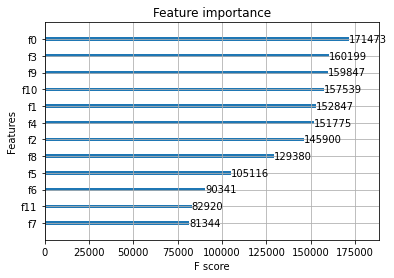

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
# load data
# plot feature importance
plot_importance(model_xgboost)
pyplot.show()

## Testing the model on Ontario validation dataset 

In [ ]:
y_onpred = model_xgboost.predict(X2_test)
#y_bpred = model_xgboost.predict(X_test)

In [ ]:
#from sklearn.metrics import balanced_accuracy_score
print('Metrics Accuracy: {0:0.4f}'.format(metrics.accuracy_score(y2_test, y_onpred)*100),'%')
#print("Accuracy:", metrics.accuracy_score(y_test, y_bpred))
print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy_score(y2_test, y_onpred)*100),'%')
print('Metrics Balanced Accuracy:{0:0.4f}'.format(metrics.balanced_accuracy_score(y2_test, y_onpred)*100),'%')

Metrics Accuracy: 25.9256 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Balanced Accuracy: 27.0417 %
Metrics Balanced Accuracy:27.0417 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


# LightGBM Classifier

In [ ]:
#from pandas.core.common import not_none
model_lgbm = lgb.LGBMClassifier(boosting_type='gbdt',
    n_estimators=500,random_state=None,
    tree_method = "gpu_hist", 
    learning_rate=0.1,
    colsample_bytree=0.8,
    gamma=0.3, reg_lambda=1,
    max_depth=5,
    subsample=1.0,
    num_leaves=40
    )
                                
                                
                                
                                
                              

In [ ]:
#t1 = time.perf_counter()
st = time.time()
model_lgbm.fit(X_train,y_train)
print( f'Total Elapsed time = {(time.time() - st)/60 :.1f} min')
#t2 = time.perf_counter()
#print('time taken to run:',(t2-t1)/60)

Total Elapsed time = 45.8 min


In [ ]:
st = time.time()
y_lgbm_pred = model_lgbm.predict(X_test)
print( f'Total Elapsed time = {(time.time() - st)/60 :.1f} min')


Total Elapsed time = 28.5 min


In [ ]:
#print("Accuracy:", metrics.accuracy_score(y_test, y_bpred))
from sklearn.metrics import balanced_accuracy_score
print('LightGBM Model accuracy score: {0:0.4f}'.format(metrics.accuracy_score(y_test, y_lgbm_pred)*100),'%')
print('LightGBM Model Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy_score(y_test, y_lgbm_pred)*100),'%')

LightGBM Model accuracy score: 68.5779 %
LightGBM Model Balanced Accuracy: 44.6875 %


# XGBRF (XGBoostRandomForest)Classifier

## Model training

In [ ]:
#from pandas.core.common import not_none
model_xgbrf = XGBRFClassifier(n_estimators=500,random_state=0,
    tree_method = "gpu_hist", 
    learning_rate=0.1,
    colsample_bytree=0.8,
    colsample_bynode=0.3,
    gamma=0.3, reg_lambda=1,
    max_depth=4,
    subsample=1.0,min_child_weight=1.0
    )

In [ ]:
st = time.time()
y_xgbrf_pred = model_xgbrf.predict(X_test)
print( f'Total Elapsed time = {(time.time() - st)/60 :.1f} min')

In [ ]:
#print("Accuracy:", metrics.accuracy_score(y_test, y_bpred))
from sklearn.metrics import balanced_accuracy_score
print('XGBRF accuracy score: {0:0.4f}'.format(metrics.accuracy_score(y_test, y_lgbm_pred)*100),'%')
print('XGBRF Model Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy_score(y_test, y_lgbm_pred)*100),'%')

# Feature Importance 

##XGBRF

In [ ]:
xgbrf_feature_imp = pd.Series(model_xgbrf.feature_importances_,index=columns).sort_values(ascending=False)
xgbrf_feature_imp

##LightGBM

In [ ]:
lbgm_feature_imp = pd.Series(model_lgbm.feature_importances_,index=columns).sort_values(ascending=False)
lgbm_feature_imp

## XGBoost Classifier

In [ ]:
xgb_feature_imp = pd.Series(model_xgboost.feature_importances_,index=columns).sort_values(ascending=False)
xgb_feature_imp

B04    0.298020
B8A    0.196573
B07    0.115568
B05    0.084412
B08    0.070683
B11    0.055569
B09    0.050295
B02    0.037539
B12    0.034126
B06    0.026752
B01    0.015330
B03    0.015134
dtype: float32